# Demo: Iris

This notebook explores how UMAP behaves when combined with the $k$-nearest
minimum spanning tree ($k$-MST) and noisy minimum spanning tree union ($n$-MST)
on the Iris dataset. The dataset consists of two clusters that only connect when
considering the $26$-nearest neighbors. Our goal is to find a graph with a
single connected component that describes how these clusters are oriented, while
maintaining their local structure.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from umap import UMAP
from sklearn.datasets import load_iris

from multi_mst import KMST, KMSTDescent, NoisyMST
from lib.drawing import draw_umap

In [3]:
X, y = load_iris(return_X_y=True)

## UMAP layouts

Cannot cross larger gaps without introducing many local edges.

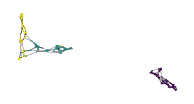

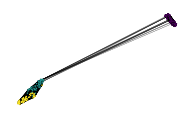

In [4]:
for k in [5, 40]:
    p = UMAP(n_neighbors=k, repulsion_strength=0.1, min_dist=0.2).fit(X)
    draw_umap(p, color=y, name="iris", alg=f"umap_{k}", size=1.2, alpha=1)

## $k$-MST layouts

Crosses all gaps $k$ times resulting in fairly uniform connectivity.

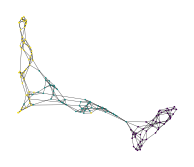

In [8]:
for k in [4]:
    p = KMST(num_neighbors=k).fit(X).umap(repulsion_strength=0.1, min_dist=0.2)
    draw_umap(p, color=y, name="iris", alg=f"kmst_{k}", size=1.2, alpha=1)

The approximate version based on nearest neighbor descent can be faster on
(high-dimensional) datasets that do not behave nicely with KDTrees.

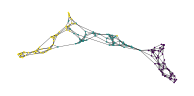

In [9]:
for k in [4]:
    p = KMSTDescent(num_neighbors=k).fit(X).umap(repulsion_strength=0.1, min_dist=0.2)
    draw_umap(p, color=y, name="iris", alg=f"kmst_descent_{k}", size=1.2, alpha=1)

## $n$-MST Layouts

Tend not to cross large gaps multiple times unless the noise fraction is high
enough.

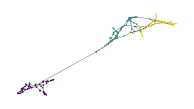

In [14]:
for k in [10]:
    p = NoisyMST(num_trees=k, noise_fraction=0.6).fit(X).umap(repulsion_strength=0.1, min_dist=0.2)
    draw_umap(p, color=y, name="iris", alg=f"nmst_{k}", size=1.2, alpha=1)